# <center> Space Missions Analysis, Visualization and Forecasting <center>

# 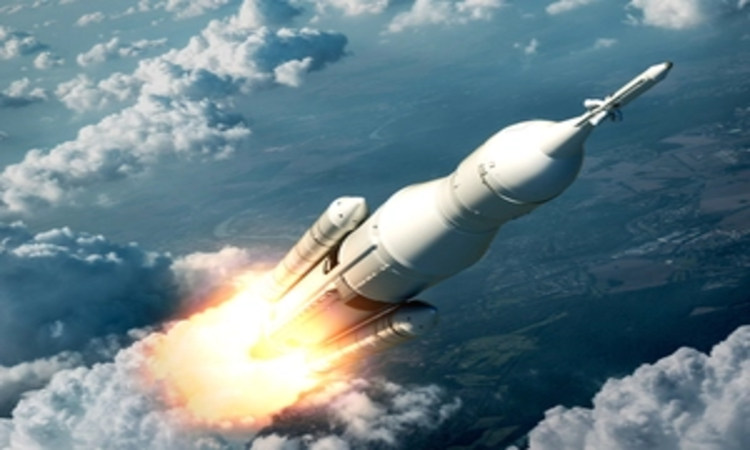

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Prediction-of-the-Status-of-Missions" data-toc-modified-id="Prediction-of-the-Status-of-Missions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Prediction of the Status of Missions</a></span><ul class="toc-item"><li><span><a href="#Label-Encoding" data-toc-modified-id="Label-Encoding-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Label Encoding</a></span></li><li><span><a href="#Splitting-the-Data" data-toc-modified-id="Splitting-the-Data-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Splitting the Data</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

Ever since the start of world war when the USSR launched the first ever manmade sattelite into the space called the Sputnik, the world has taken great interests in trying to explore beyond the planet. It provides immense national pride when launches are successful. However, it is also incredibly disheartening when the missions do nott succeed and millions of dollars and national dreams burst into flames. 

In this notebook we will use Space_Mission_Dataset. This DataSet includes all the space missions since the beginning of Space Race (1957).There are three parts to our report, as follows:

-  Data Cleaning and Feature Engineering
-  Exploratory Data Analysis
-  Prediction of Mission Status

Our first objective is to find out the number of missions versus different features, and analyze  various successes and failures of the space organisations worldwide. Our second goal is to implement several machine learning algorithms such as Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier and XGBoost Classifier to predict whether the missions are successful or not. We will compare the results of these models to discover which algorithm works better for this specific dataset.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode (connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.io as pio
pio.renderers.default='notebook'

## Loading Dataset

In [ ]:
df=pd.read_csv('../input/all-space-missions-from-1957/Space_Corrected.csv')

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

## Data Cleaning

First we remove unnecessary columns.

In [ ]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Detail'], axis=1,inplace=True)

Next we create a dataframe that shows the percentage of null values in each column of df.

In [ ]:
100*df.isnull().sum()/df.shape[0]

The Rocket column contains 77% null values, so we drop the entire column.

In [ ]:
df.drop([' Rocket'], axis=1,inplace=True)

## Feature Engineering

We rename some of the columns.

In [ ]:
df.columns=df.columns.str.lower().str.replace(' ','_')

Now we change the format of date and add month column to df.

In [ ]:
df['datum']=pd.to_datetime(df['datum'])

In [ ]:
type(df['datum'].iloc[0])

In [ ]:
df['year']=df['datum'].apply(lambda x: x.year)

In [ ]:
df.drop(['datum'], axis=1,inplace=True)

Now we extract the name of countries from the location column and add the country column to the dataframe.

In [ ]:
df['country']=df['location'].apply(lambda x: x.split(',')[-1])

In [ ]:
df.head(2)

## Exploratory Data Analysis

We want to find the total number of missions conducted by each company.

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=list(df['company_name'].value_counts().index), height=list(df['company_name'].value_counts()),color='g')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=14)
plt.ylabel('Number of Missions',fontsize=14)
plt.title('Total Number Of Missions Conducted By Each Company',fontsize=18)
plt.show()

We visualize the status of missions conducted by each company.

In [ ]:
new1=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new1.append(df1[df1['status_mission']=='Success']['status_mission'].count())
    
new2=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new2.append(df1[df1['status_mission']=='Failure']['status_mission'].count())
    
new3=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new3.append(df1[df1['status_mission']=='Prelaunch Failure']['status_mission'].count())
    
new4=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new4.append(df1[df1['status_mission']=='Partial Failure']['status_mission'].count())

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=df['company_name'].unique(), height=new1, color='blue')
plt.bar(x=df['company_name'].unique(), height=new2, color='lime')
plt.bar(x=df['company_name'].unique(), height=new4, color='deeppink')
plt.bar(x=df['company_name'].unique(), height=new3, color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=14)
plt.ylabel('Number of Missions',fontsize=14)
plt.legend(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],fontsize=12, title='Mission Status', title_fontsize=14)
plt.title('Mission status for each company',fontsize=18)
plt.show()

We find the top 5 companies with the highest number of successful, failed, prelaunch failed and partially failed missions.

In [ ]:
df_success=pd.DataFrame({'company':df['company_name'].unique(), 'successful_missions':new1})
df_success_sorted=df_success.sort_values(by='successful_missions',ascending=False).head(5)

df_failed=pd.DataFrame({'company':df['company_name'].unique(), 'failed_missions':new2})
df_failed_sorted=df_failed.sort_values(by='failed_missions',ascending=False).head(5)

df_prelaunch_failed =pd.DataFrame({'company':df['company_name'].unique(), 'prelaunch_failed _missions':new3})
df_prelaunch_failed_sorted=df_prelaunch_failed.sort_values(by='prelaunch_failed _missions',ascending=False).head(5)

df_partially_failed =pd.DataFrame({'company':df['company_name'].unique(), 'partially_failed _missions':new4})
df_partially_failed_sorted=df_partially_failed.sort_values(by='partially_failed _missions',ascending=False).head(5)

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.bar(x=df_success_sorted['company'], height=df_success_sorted['successful_missions'],color='g')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.ylabel('Number of Missions',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Successful Missions',fontsize=11)

plt.subplot(2,2,2)
plt.bar(x=df_failed_sorted['company'], height=df_failed_sorted['failed_missions'],color='b')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Failed Missions',fontsize=11)

plt.figure(figsize=(15,8))
plt.subplot(2,2,3)
plt.bar(x=df_prelaunch_failed_sorted['company'], height=df_prelaunch_failed_sorted['prelaunch_failed _missions'],color='y')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.ylabel('Number of Missions',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Prelaunch Failed Missions',fontsize=11)

plt.subplot(2,2,4)
plt.bar(x=df_prelaunch_failed_sorted['company'], height=df_partially_failed_sorted['partially_failed _missions'],color='r')
plt.xticks(rotation=90)
plt.xlabel('Company',fontsize=11)
plt.title('Top 5 Companies With The Highest Number Of Partially Failed Missions',fontsize=11)
plt.show()

Let's find the total number of active and retired rockets.

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='status_rocket', data=df, palette='viridis')
plt.xticks([0,1], ['Active', 'Retired'], fontsize=12)
plt.xlabel('Rocket Status', fontsize=14)
plt.ylabel('Number of Rockets', fontsize=14)
plt.title('Total Number Of Active And Retired Rockets', fontsize=18)
plt.show()

We analyze the number of active and retired rockets in each company.

In [ ]:
new5=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new5.append(df1[df1['status_rocket']=='StatusActive']['status_rocket'].count())

new6=[]
for x in df['company_name'].unique():
    df1=df[df['company_name']==x]
    new6.append(df1[df1['status_rocket']=='StatusRetired']['status_rocket'].count())

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=df['company_name'].unique(), height=new6,color='royalblue')
plt.bar(x=df['company_name'].unique(), height=new5,color='deeppink')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Number of Rockets', fontsize=14)
plt.xticks(rotation=90)
plt.legend(['Retired', 'Active'], title='Rocket Status', fontsize=12, title_fontsize=13)
plt.title('Number of Active And Retired Rockets In Each Company', fontsize=18)
plt.show()

We find the status of missions in each year.

In [ ]:
new7=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new7.append(df2[df2['status_mission']=='Success']['status_mission'].count())

new8=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new8.append(df2[df2['status_mission']=='Failure']['status_mission'].count())
    
new9=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new9.append(df2[df2['status_mission']=='Prelaunch Failure']['status_mission'].count())
    
new10=[]
for x in df['year'].unique():
    df2=df[df['year']==x]
    new10.append(df2[df2['status_mission']=='Partial Failure']['status_mission'].count())    

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=df['year'].unique(), height=new7,color='royalblue')
plt.bar(x=df['year'].unique(), height=new8,color='yellow')
plt.bar(x=df['year'].unique(), height=new10,color='limegreen')
plt.bar(x=df['year'].unique(), height=new9,color='red')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=15)
plt.legend(['Success', 'Failure','Partial Failure', 'Prelaunch Failure'], fontsize=12, title='Mission Status', title_fontsize=13, bbox_to_anchor=(1,1.02))
plt.title('Mission Status In Each Year', fontsize=18)
plt.show()

Let's find the top 15 locations with the highest number of missions.

In [ ]:
df_loc=df.groupby(by='location').count().sort_values(by='company_name', ascending=False).head(15)

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=list(df_loc.index), height=df_loc['company_name'],color='teal')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.title('Top 15 Locations With The Highest Number Of Missions', fontsize=18)
plt.show()

Let's find the number of missions carried out in each country.

In [ ]:
df_country=df.groupby('country').count().sort_values(by='company_name',ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=list(df_country.index), height=df_country['company_name'],color='blueviolet')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.title('Number of Space Missions in Different Countries', fontsize=18)
plt.show()

Russia carried out the highest number of missions and  USA was in the second place. 

In [ ]:
data=dict(type='choropleth', locations=list(df_country.index), locationmode='country names', colorscale='viridis', reversescale=True, text=list(df_country.index),z=df_country['company_name'], colorbar={'title':'Number of Missions'})
layout=dict(title='Number of Space Missions In Different Countries', geo=dict(showframe=False, projection={'type': 'mercator'}))
choromap=go.Figure(data=[data], layout=layout)
iplot(choromap)

We visualize the percentage distribution of top 5 countries involved in space missions.

In [ ]:
df_country_10=df.groupby('country').count().sort_values(by='company_name',ascending=False).head(5)

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(x=df_country_10['company_name'],labels=list(df_country_10.index), pctdistance=0.8, labeldistance=1.05,autopct='%1.0f%%',
  explode=(0.1,0,0,0,0),shadow=True,
    startangle=0,
  colors=['limegreen', 'deeppink', 'deepskyblue', 'orange','teal'],
    textprops={'fontsize':14})
plt.title('Top 5 Countries Involved In Space Missions', fontsize=15)
plt.show()

We analyze the status of missions in each country.

In [ ]:
new11=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new11.append(df_count[df_count['status_mission']=='Success']['status_mission'].count())

new12=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new12.append(df_count[df_count['status_mission']=='Failure']['status_mission'].count())
    
new13=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new13.append(df_count[df_count['status_mission']=='Prelaunch Failure']['status_mission'].count())
    
new14=[]
for x in df['country'].unique():
    df_count=df[df['country']==x]
    new14.append(df_count[df_count['status_mission']=='Partial Failure']['status_mission'].count())

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=df['country'].unique(), height=new11,color='royalblue')
plt.bar(x=df['country'].unique(), height=new12,color='yellow')
plt.bar(x=df['country'].unique(), height=new14,color='red')
plt.bar(x=df['country'].unique(), height=new13,color='limegreen')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.legend(['Success', 'Failure','Partial Failure', 'Prelaunch Failure'], fontsize=12, title='Mission Status', title_fontsize=13, bbox_to_anchor=(1,1.02))
plt.title('Mission status In Each Country', fontsize=18)
plt.show()

Here we explore the number of missions carried out in US states.

In [ ]:
df_usa=df[df['country']== ' USA']
df_usa['state']=df_usa['location'].apply(lambda x: x.split(',')[-2])
df_usa.head(2)

In [ ]:
df_usa_sorted=df_usa.groupby('state').count().sort_values(by='company_name',ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=list(df_usa_sorted.index), height=df_usa_sorted['company_name'], color='darkorchid')
plt.xlabel('US State', fontsize=14)
plt.ylabel('Number Of Missions', fontsize=14)
plt.xticks(rotation=90)
plt.title('Number Of Missions Carried Out In US States', fontsize=18)
plt.show()

In [ ]:
data=dict(type='choropleth', locations=['FL','CA','VA','TX','MH','AK'], locationmode='USA-states', colorscale='viridis', reversescale=True, text=['FL','CA','VA','TX','MH','AK'],z=df_usa_sorted['company_name'], colorbar={'title':'Number of Missions'})
layout=dict(title='Number of Space Missions in US States', geo=dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'))
choromap=go.Figure(data=[data], layout=layout)
iplot(choromap)

Let's find the number of missions conducted in each country in each year.

In [ ]:
m=[]
for x in df['country'].unique():
    n=[]
    df_c=df[df['country']== x]
    for y in df['year'].unique():
        df_y=df_c[df_c['year']==y]
        n.append(df_y.count()['year'])
    m.append(n)

In [ ]:
pivot=pd.DataFrame(data=m, columns=df['year'].unique(), index=df['country'].unique())

In [ ]:
pivot.head(2)

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot,cmap='coolwarm',linecolor='white', linewidth= 1)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.title('Number Of Missions In Each Country In Each Year', fontsize=25)
plt.show()

## Prediction of the Status of Missions

### Label Encoding

**Company**

In [ ]:
le1=LabelEncoder()
le1.fit(df['company_name'])
df['company_name']=le1.transform(df['company_name'])

**Status Rocket**

In [ ]:
le2=LabelEncoder()
le2.fit(df['status_rocket'])
df['status_rocket']=le2.transform(df['status_rocket'])

**Country**

In [ ]:
le3=LabelEncoder()
le3.fit(df['country'])
df['country']=le3.transform(df['country'])

In [ ]:
df.head(2)

### Splitting the Data

In [ ]:
X=df[['company_name', 'status_rocket', 'year', 'country']]
y= df['status_mission']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_lr))
print('\n')
print(classification_report(y_test,predictions_lr))

This model is pretty bad because of zero values

### Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions_dtc=dtc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_dtc))
print('\n')
print(classification_report(y_test,predictions_dtc))

### Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions_rfc=rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_rfc))
print('\n')
print(classification_report(y_test,predictions_rfc))

### Support Vector Classifier

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_svc))
print('\n')
print(classification_report(y_test,predictions_svc))

To improve the results obtained by SVC, we use GridSearchCV and define C and gamma parameters.

In [ ]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [ ]:
gs=GridSearchCV(SVC(),param_grid, verbose=3)
gs.fit(X_train,y_train)
predictions_gs=gs.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_gs))
print('\n')
print(classification_report(y_test,predictions_gs))

### XGBoost Classifier

In [ ]:
xgbc=xgb.XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)
xgbc.fit(X_train,y_train)

In [ ]:
predictions_xgbc=xgbc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_xgbc))
print('\n')
print(classification_report(y_test,predictions_xgbc))

In [ ]:
print('Accuracy Score, Logistic Regression: ', round(accuracy_score(y_test,predictions_lr),ndigits=4))
print('Accuracy Score, Decision Tree Classifier: ', round(accuracy_score(y_test,predictions_dtc),ndigits=4))
print('Accuracy Score, Random Forest Classifier: ', round(accuracy_score(y_test,predictions_rfc),ndigits=4))
print('Accuracy Score, Support Vector Classifier: ', round(accuracy_score(y_test,predictions_gs),ndigits=4))
print('Accuracy Score, XGBoost Classifier: ', round(accuracy_score(y_test,predictions_xgbc), ndigits=4))

So we conclude that Support Vector Classifier for which the hyper-parameters were tuned by Grid Search has an accuracy of 90.52%, and so it is the best model for predicting the status of the missions.

## Conclusion

-  We performed Data Cleaning and Feature Engineering to convert the dataset to an acceptable format.

-  We performed Exploratory Data Analysis and visualized the number of missions versus different features.

-  Support Vector Classifier which was optimized by Grid Search with the accuracy of 90.52% was the best model for predicting  the status of the missions.